In [20]:
import sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [75]:
# Load data
tokens_df = pd.read_csv("../data_work/allcons_tokens_df.csv")

tokens_df['tokens'] = tokens_df['tokens'].astype(str)
tokens_df['tokens'] = tokens_df['tokens'].apply(lambda t: t.replace("[", "").replace("]", "").replace("'", "").replace(" ", "").split(","))

In [76]:
tokens_df.shape

(123224, 5)

In [77]:
tokens = tokens_df['tokens'][0::10]
tokens = [[t.lower() for t in l] for l in tokens]

In [104]:
# Instantiate graph
G = nx.Graph()

In [105]:
# Create the graph
for i in tokens:
  G.add_edges_from(list(itertools.combinations(i,2)))

In [92]:
# Calculate degre-centrality and assign it as a node-attribute
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')

In [93]:
# Getting a "reasonable" lower bound.
perc_filter = np.percentile([v for u,v in degree_centrality.items()], 95)

In [94]:
perc_filter

0.016504740723399275

In [95]:
# Make a subgraph based on nodes with a degree_centrality over the threshold
nodes_selected = [x for x,y in degree_centrality.items() if y >= perc_filter]

G = G.subgraph(nodes_selected)

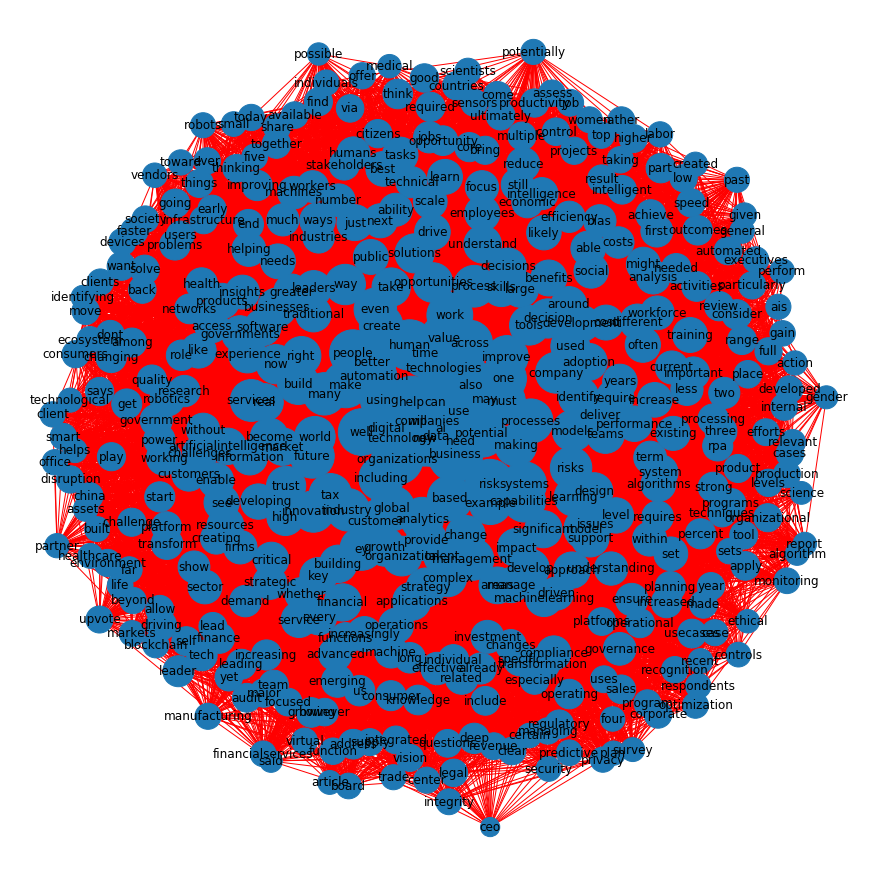

In [97]:
# Draw network - further removal of stopwords required
plt.figure(figsize=(12,12)) 
nx.draw_kamada_kawai(G, with_labels = True, node_size=[v * 10 for v in dict(G.degree).values()], edge_color = 'r')